In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
tr_df = pd.read_csv('traffic.csv')[:230]

In [3]:
tr_df.head()

,Date,Visits
0,01-01-2020,1554.0
1,01-02-2020,2820.0
2,01-03-2020,2970.0
3,01-04-2020,2111.0
4,01-05-2020,2393.0


In [4]:
len(tr_df)

230

In [5]:
tr_df.iloc[-1]

,229
Date,8/17/2020
Visits,3456.0


In [6]:
Cv = np.cumsum(np.array(tr_df['Visits']))

In [7]:
tr_df['CVis'] = Cv

In [8]:
tr_df.head()

,Date,Visits,CVis
0,01-01-2020,1554.0,1554.0
1,01-02-2020,2820.0,4374.0
2,01-03-2020,2970.0,7344.0
3,01-04-2020,2111.0,9455.0
4,01-05-2020,2393.0,11848.0


In [9]:
True in list(tr_df['Visits'][:229].isna())

False

<Axes: >

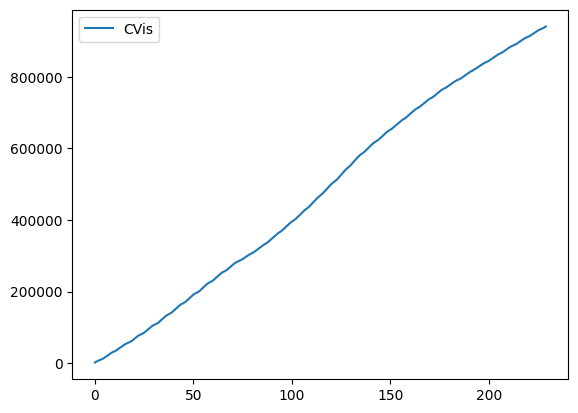

In [10]:
tr_df[['CVis']].plot(kind='line')

In [209]:
tr_df['P'] = tr_df['CVis']/3500.0
tr_df['H'] = np.array([math.floor(i) for i in list(tr_df['P'])])

In [210]:
t = []
ev = list(tr_df['H'][190:220])
c = ev[0]
co = 1.
for i in range(1, len(ev)):
  if ev[i] == c:
    co += 1.
    c = ev[i]
  else:
    t += [co]*(ev[i]-c)
    c = ev[i]
    co += 1.

t = np.array(t, dtype=np.float64)

In [211]:
#!pip install hawkeslib

In [ ]:
from hawkeslib import UnivariateExpHawkesProcess as UVHP

In [212]:


uv = UVHP()
uv.fit(t)
print(uv.get_params())
mu, alpha, beta = uv.get_params()

(0.9499501984868699, 0.03592857382737796, 0.049316988171362944)


In [19]:

#!pip install hawkes

In [20]:

import Hawkes as hk

In [213]:

model = hk.simulator()

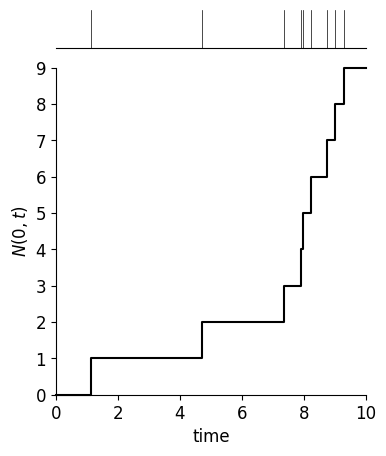

In [214]:
para = {'mu':mu, 'alpha':alpha, 'beta':beta}
itv = [0,10]
model = hk.simulator().set_kernel('exp').set_baseline('const').set_parameter(para)
T = model.simulate(itv)
model.plot_N()
#model.plot_l()

In [215]:
tr_dfp = tr_df[-10:]

In [216]:
T

array([1.12713972, 4.72480106, 7.37093316, 7.91709448, 7.96938124,
       8.21650881, 8.735689  , 9.01405902, 9.28054099])

In [217]:
len(T)

9

In [224]:
Ts = []
for i in range(10000):
  T = model.simulate(itv)
  #print(2000*len(T))
  Ts.append(3500*len(T))

In [225]:
pd.DataFrame(Ts).describe()

,0
count,10000.000000
mean,33459.300000
std,10959.977446
min,0.000000
25%,24500.000000
50%,31500.000000
75%,42000.000000
max,80500.000000


In [229]:
preds = pd.DataFrame()
preds['p'] = np.array(Ts)
len(preds.query('25830 < p < 31570'))/10000

0.2556

<Axes: ylabel='Frequency'>

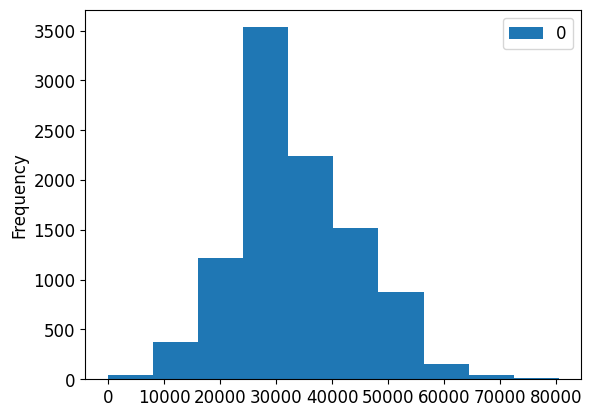

In [226]:
pd.DataFrame(Ts).plot(kind='hist')

In [227]:
M = list(tr_dfp['CVis'])
print(M[-1] - M[0], np.array(Ts).mean())

28761.0 33459.3


In [221]:
tr_df.describe()

,Visits,CVis,P,H
count,230.000000,230.000000,230.000000,230.000000
mean,4092.382609,475934.465217,135.981276,135.469565
std,1013.848340,290111.232676,82.888924,82.860363
min,1554.000000,1554.000000,0.444000,0.000000
25%,3433.500000,222056.500000,63.444714,63.250000
50%,4000.500000,468817.500000,133.947857,133.500000
75%,4880.250000,744353.750000,212.672500,211.750000
max,6659.000000,941248.000000,268.928000,268.000000


In [222]:
tr_dfp

,Date,Visits,CVis,P,H
220,08-08-2020,2223.0,912487.0,260.710571,260
221,08-09-2020,2623.0,915110.0,261.460000,261
222,08-10-2020,3638.0,918748.0,262.499429,262
223,08-11-2020,3740.0,922488.0,263.568000,263
224,08-12-2020,3767.0,926255.0,264.644286,264
225,8/13/2020,3621.0,929876.0,265.678857,265
226,8/14/2020,2971.0,932847.0,266.527714,266
227,8/15/2020,2221.0,935068.0,267.162286,267
228,8/16/2020,2724.0,937792.0,267.940571,267
229,8/17/2020,3456.0,941248.0,268.928000,268
